In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
netflix=pd.read_csv("netflix_titles.csv")

In [ ]:
netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [ ]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
netflix.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [ ]:
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

<Axes: >

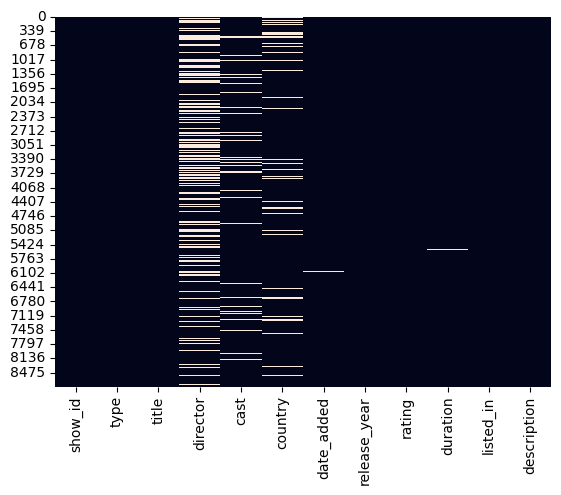

In [ ]:
sns.heatmap(netflix.isnull(), cbar=False)

In [ ]:
netflix.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [ ]:
data=netflix.copy()

In [ ]:
data.shape

(8807, 12)

In [ ]:
data=data.dropna()

In [ ]:
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [ ]:
data.shape

(5332, 12)

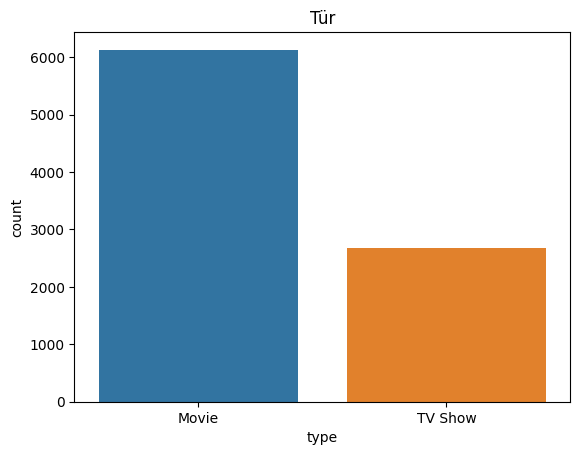

In [ ]:
sns.countplot(data=netflix, x="type")
plt.title("Tür")
plt.show()

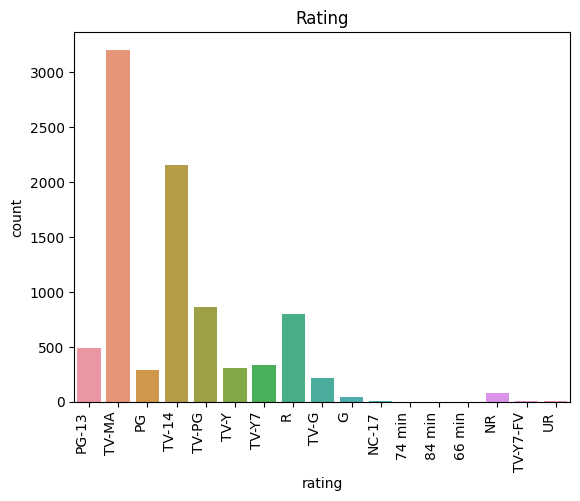

In [ ]:
sns.countplot(data=netflix, x="rating")
plt.xticks(rotation=90, ha="right")
plt.title("Rating")
plt.show()

Text(0.5, 1.0, 'tür ve reyting oranları')

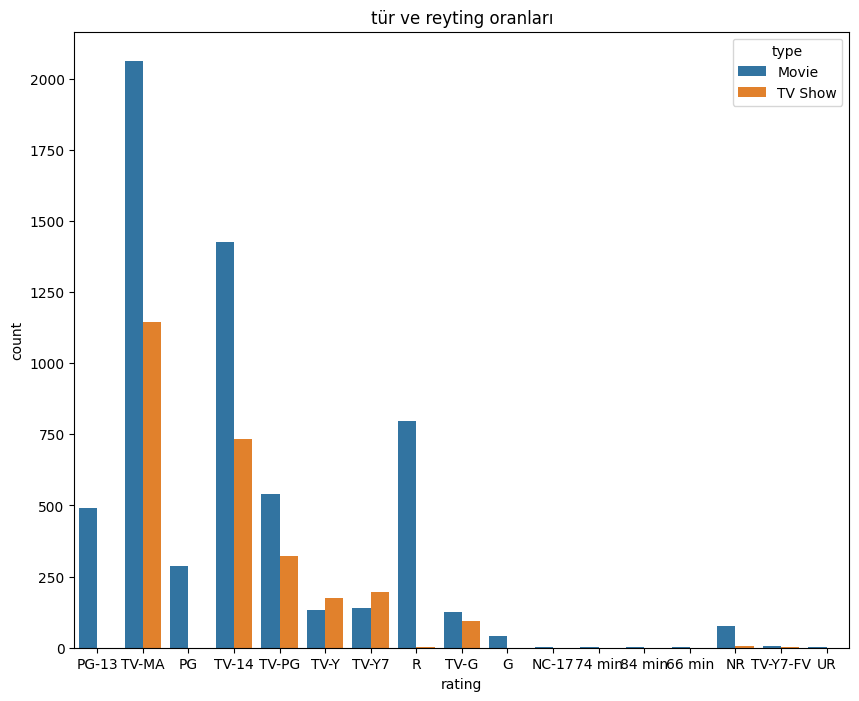

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x="rating", hue="type", data=netflix)
plt.title("tür ve reyting oranları")

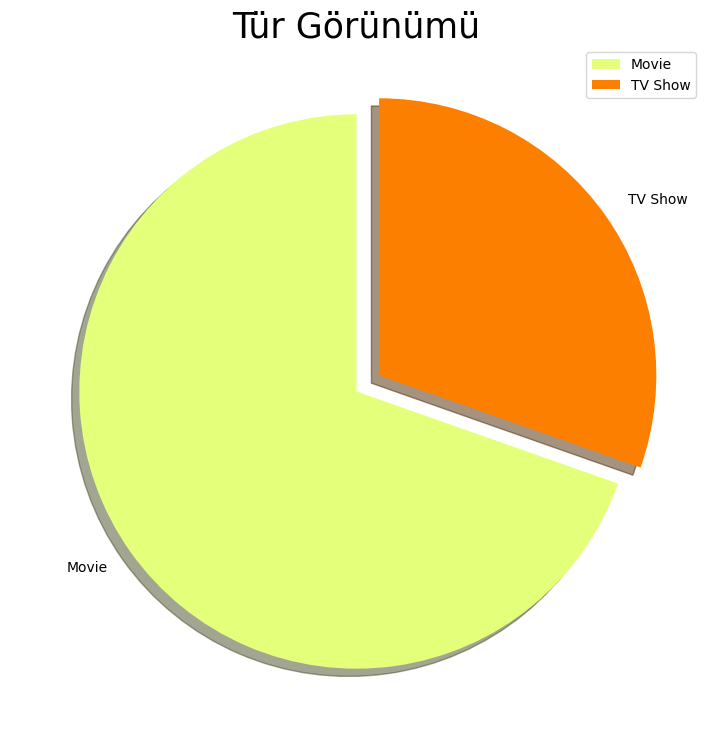

In [ ]:
labels=["Movie","TV Show"]
size=netflix["type"].value_counts()
colors=plt.cm.Wistia(np.linspace(0,1,2))
explode=[0,0.1]
plt.rcParams["figure.figsize"]=(9,9)
plt.pie(size, labels=labels, colors=colors, explode=explode, shadow=True, startangle=90)
plt.title("Tür Görünümü",fontsize=25)
plt.legend()
plt.show()

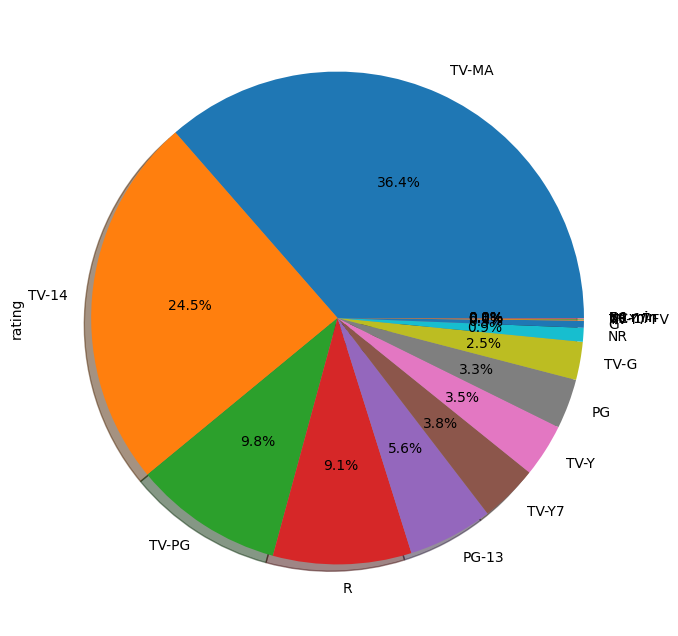

In [ ]:
netflix["rating"].value_counts().plot.pie(autopct="%1.1f%%", shadow=True, figsize=(10,8))
plt.show()

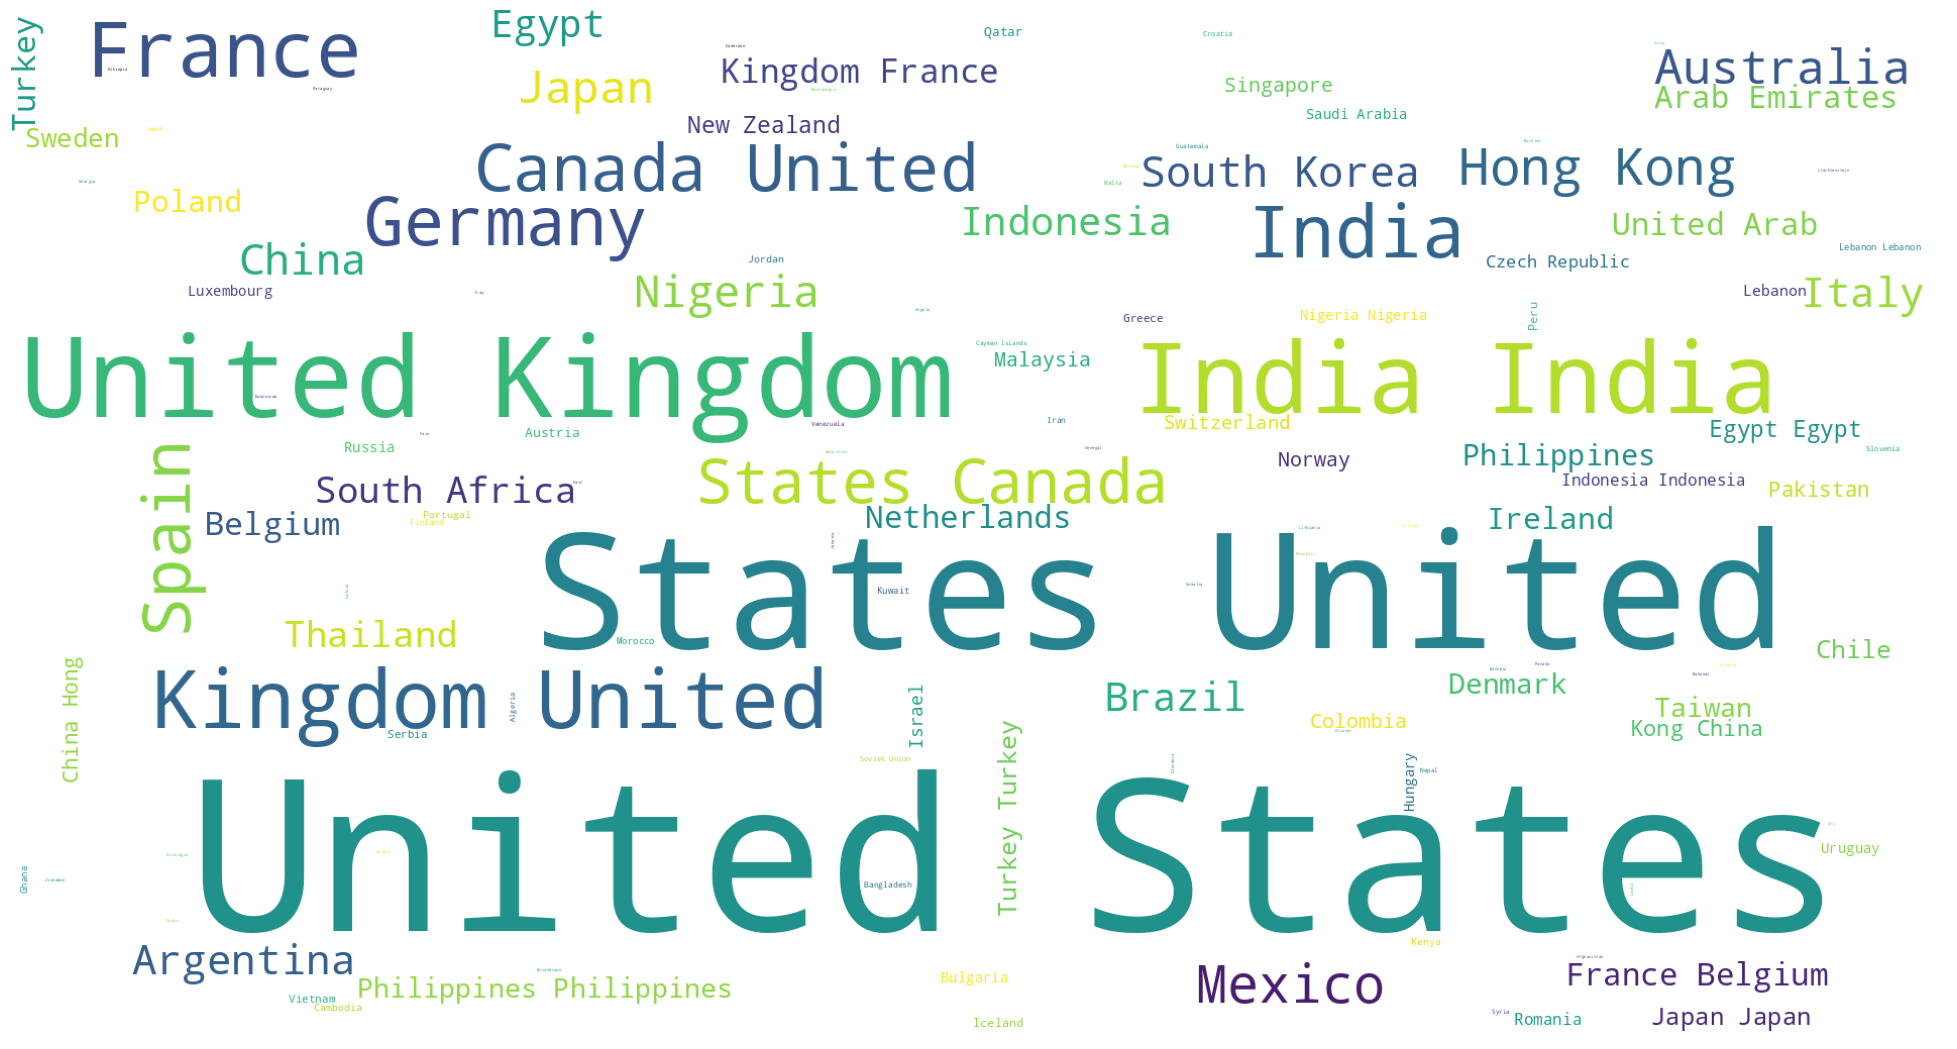

In [ ]:
plt.subplots(figsize=(25,15))
wordcloud=WordCloud(
    background_color="white",
    width=1920,
    height=1020
).generate(" ".join(data.country))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("country.png")
plt.show()


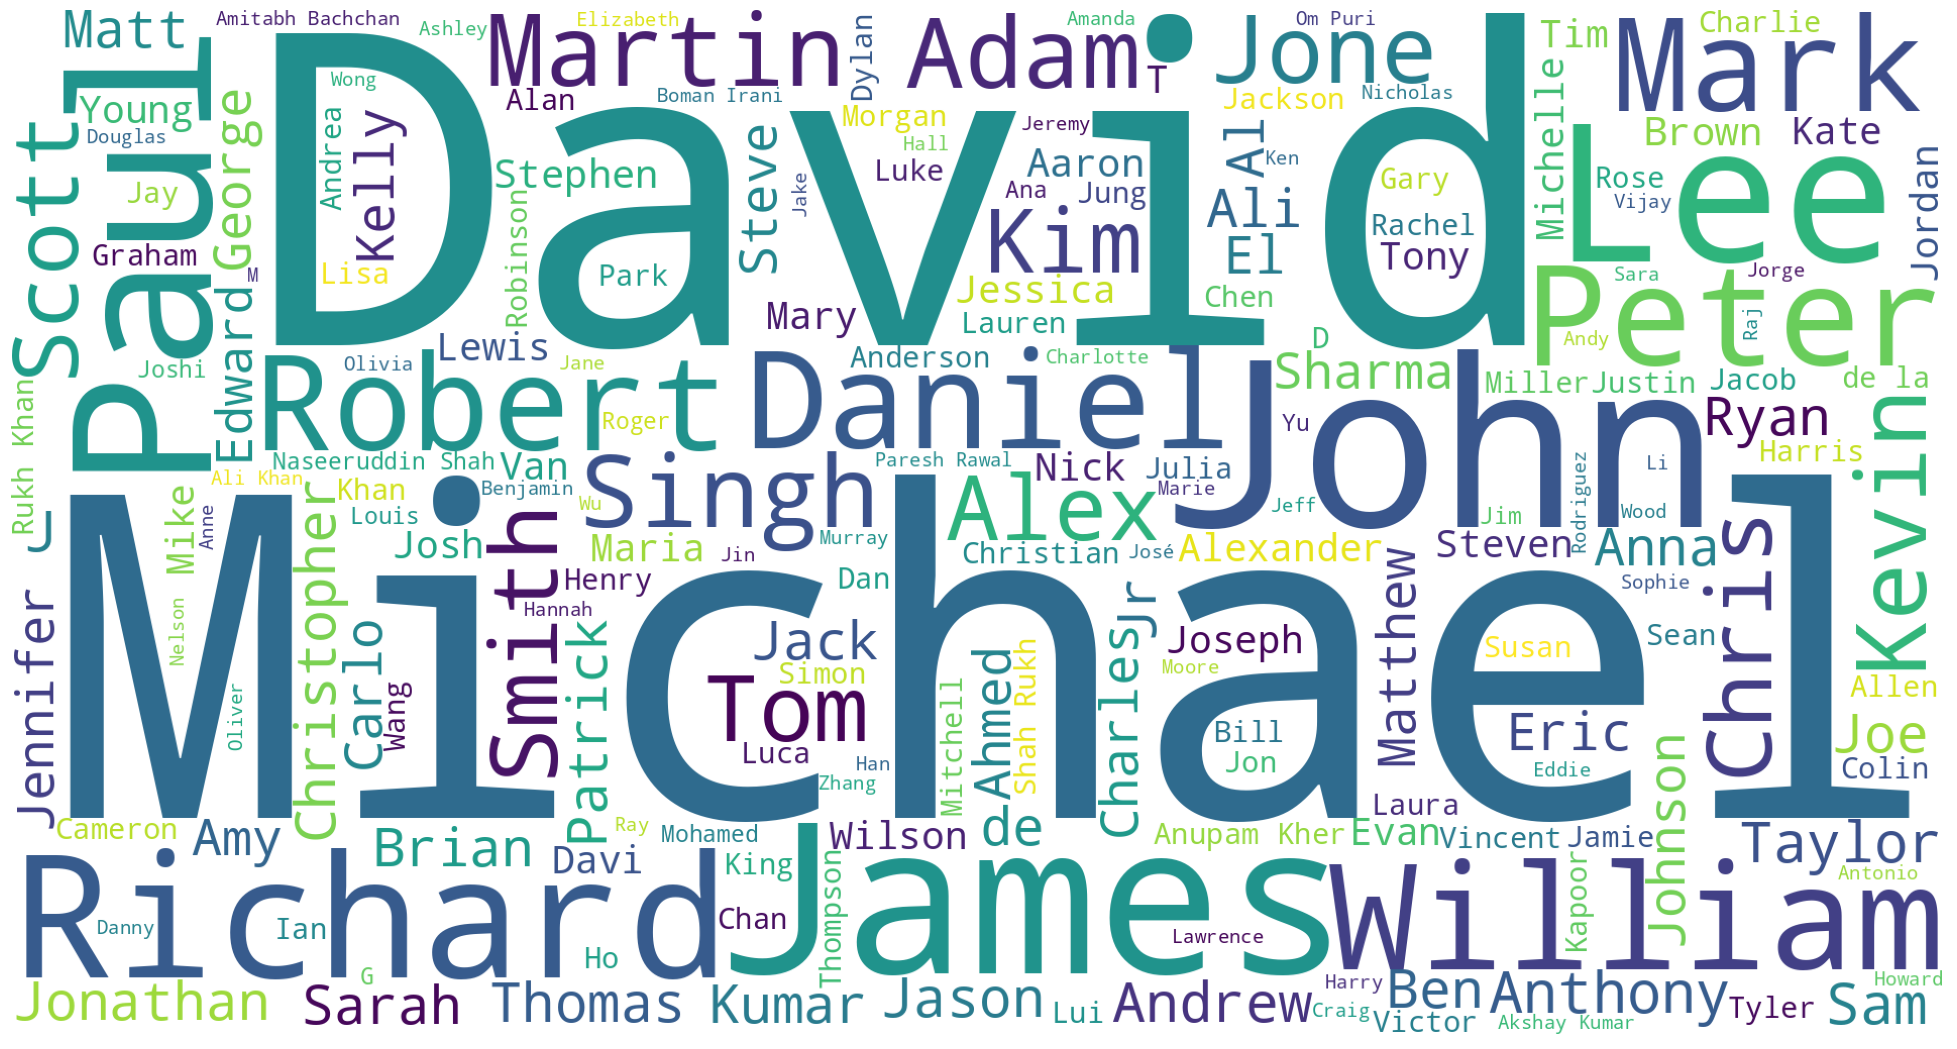

In [ ]:
plt.subplots(figsize=(25,15))
wordcloud=WordCloud(
    background_color="white",
    width=1920,
    height=1020
).generate(" ".join(data.cast))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("cast.png")
plt.show()

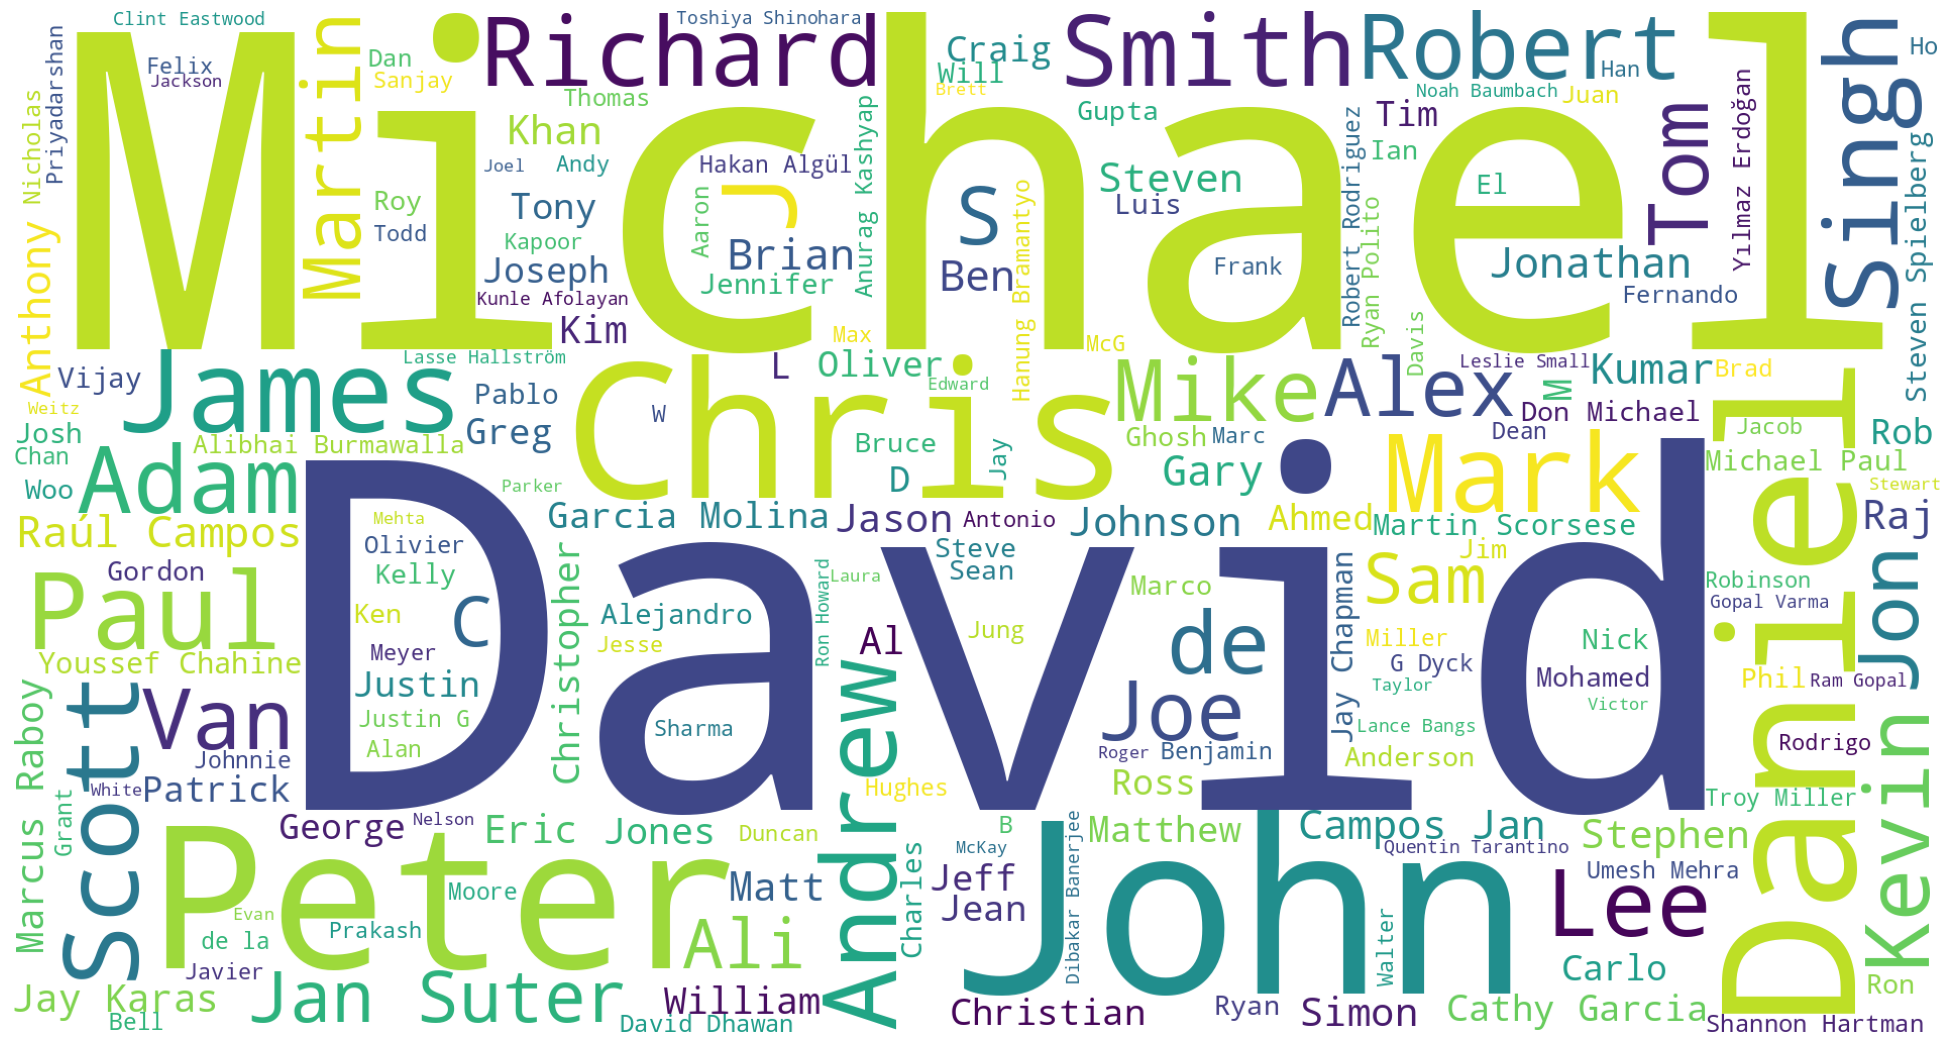

In [ ]:
plt.subplots(figsize=(25,15))
wordcloud=WordCloud(
    background_color="white",
    width=1920,
    height=1020
).generate(" ".join(data.director))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("director.png")
plt.show()

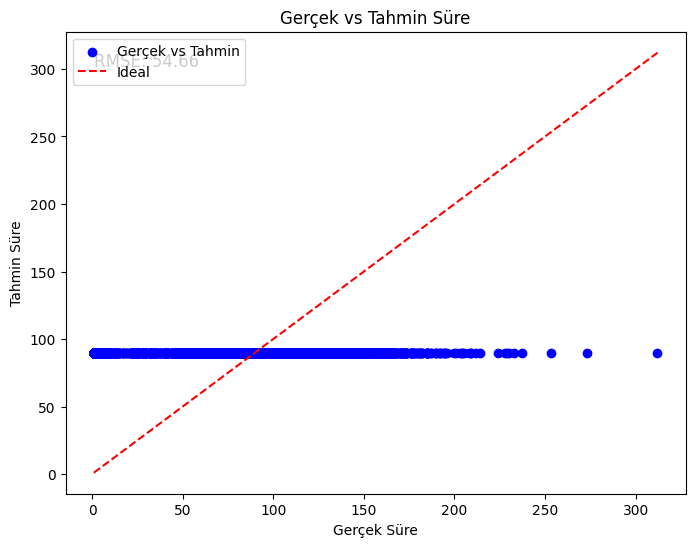

In [ ]:


# Tahmin edilen süreyi tüm veri setine uygulandı
predicted_duration = np.full(len(netflix), 90)  # Tüm veri setine 90 dakika olarak tahmin edildiği varsayıldı

# Gerçek sürelerin örneği
actual_duration = netflix["duration"].str.extract("(\d+)", expand=False).astype(float)  # Veri kümesindeki süreleri sayısal değerlere dönüştürüyoruz
actual_duration = actual_duration.dropna()
predicted_duration = predicted_duration[:len(actual_duration)]
# RMSE hesaplama
rmse = np.sqrt(mean_squared_error(actual_duration, predicted_duration))

# Görselleştirme
plt.figure(figsize=(8, 6))
plt.scatter(actual_duration, predicted_duration, color='blue', label='Gerçek vs Tahmin')
plt.plot([min(actual_duration), max(actual_duration)], [min(actual_duration), max(actual_duration)], color='red', linestyle='--', label='Ideal')
plt.xlabel('Gerçek Süre')
plt.ylabel('Tahmin Süre')
plt.title('Gerçek vs Tahmin Süre')
plt.legend()
plt.text(min(actual_duration), max(actual_duration), f'RMSE: {rmse:.2f}', ha='left', va='top', fontsize=12)
plt.show()


In [ ]:
# Veri setini train, validation ve test olarak bölecek oranları belirlendi
train_ratio = 0.7
validation_ratio = 0.15
test_ratio = 0.15

# Veri setini train ve geri kalan kısımlara ayrıldı
train_data, remaining_data = train_test_split(df, test_size=1 - train_ratio, random_state=42)

# Geri kalan veri setini validation ve test olarak bölecek oranları hesaplandı
remaining_ratio = validation_ratio + test_ratio
validation_split = validation_ratio / remaining_ratio

# Validation ve test veri setini ayrıldı
validation_data, test_data = train_test_split(remaining_data, test_size=validation_split, random_state=42)

# Veri seti boyutlarını kontrol edildi
print("Train veri seti boyutu:", len(train_data))
print("Validation veri seti boyutu:", len(validation_data))
print("Test veri seti boyutu:", len(test_data))

Train veri seti boyutu: 6164
Validation veri seti boyutu: 1321
Test veri seti boyutu: 1322


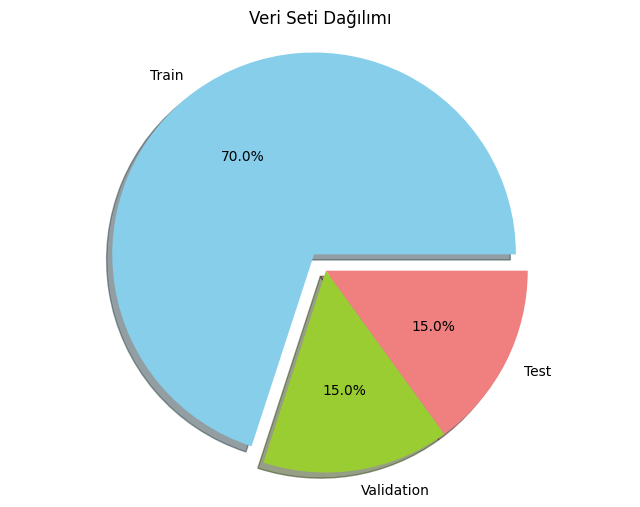

In [ ]:
# Veri seti boyutlarını belirtildi
sizes = [len(train_data), len(validation_data), len(test_data)]
labels = ['Train', 'Validation', 'Test']
colors = ['skyblue', 'yellowgreen', 'lightcoral']
explode = (0.1, 0, 0)  # Sadece Train veri setini vurgulamak için dilimleri ayrıldı
# Pasta grafiği oluşturuldu
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', shadow=True)
plt.title('Veri Seti Dağılımı')
plt.axis('equal')
plt.show()